# Data Exploration and Analysis with Python

First, let's open a file and store the data in a Pandas Dataframe:

In [10]:
import pandas as pd

df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


Check if there are missing data

In [11]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

Identify missing data:

In [12]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


Fix missing data: Replace null Study Hours by the average of the rest of data

In [13]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())

df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.000000,NaN
23,Ted,10.413043,NaN


Now you see that Study Hours for Ted is no longer NA. Do the same process for Grade and check if there is any other missing data:

In [14]:
df_students.Grade = df_students.Grade.fillna(df_students.Grade.mean())

df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade


No null results! So that means we no longer have missing data (null values)

Let's add a new column (Pass) which indicates if the student got a grade higher than 60 or not.

In [15]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.000000,50.000000,False
1,Joann,11.500000,50.000000,False
2,Pedro,9.000000,47.000000,False
3,Rosie,16.000000,97.000000,True
4,Ethan,9.250000,49.000000,False
5,Vicky,1.000000,3.000000,False
6,Frederic,11.500000,53.000000,False
7,Jimmie,9.000000,42.000000,False
8,Rhonda,8.500000,26.000000,False
9,Giovanni,14.500000,74.000000,True


Let's get a specific student's data:

In [16]:
import json

# GET /student
name = "Ethan"

student_data = df_students.loc[df_students['Name'] == name]
print(student_data.to_json())

{"Name":{"4":"Ethan"},"StudyHours":{"4":9.25},"Grade":{"4":49.0},"Pass":{"4":false}}


And let's get all students who passed:

In [17]:
# GET /student

approved_students = df_students.loc[df_students['Pass'] == True]
approved_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True
11,Rajab,13.75,62.0,True
14,Jenny,15.50,70.0,True
20,Daniel,12.50,63.0,True
21,Aisha,12.00,64.0,True


Finally, let's create a plot (chart), display it and save it into a file:

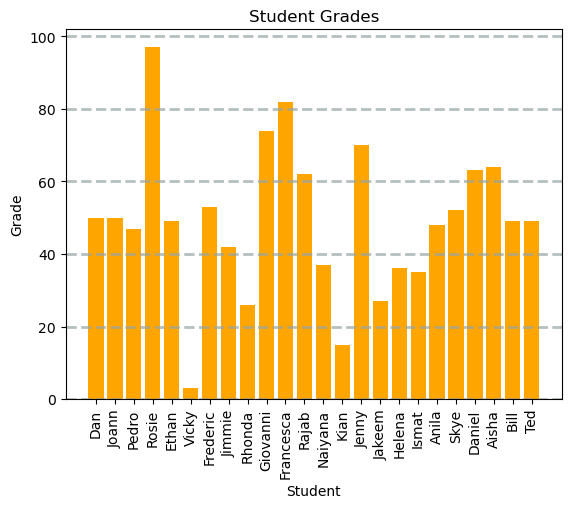

<Figure size 640x480 with 0 Axes>

In [18]:
# GET /plot

# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Save the plot
plt.savefig('student_grades.png')

Now we are going to expose some code into an API that other apps can use.

You need to modify 3 cells:

1. The cell that gets data from an specific student
2. The cell that gets students who passed
3. The cell with the plot

Add the code according to the instructor's specifications.